# plot function tests

In [1]:
__author__    = 'Steve Nicholes'
__copyright__ = 'Copyright (C) 2017 Steve Nicholes'
__license__   = 'GPL v3'
__version__   = '0.1.0'

In [35]:
# Imports
%load_ext autoreload
%autoreload 2
import sys
sys.path = [r'C:\GitHub\fivecentplots'] + sys.path
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
%matplotlib inline

osjoin = os.path.join
st = pdb.set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read data

In [3]:
df = pd.read_csv(r'C:\GitHub\fivecentplots\fivecentplots\tests\fake_data.csv')

# Plots

In [4]:
#fcp.set_theme('white')
fcp.set_theme('gray')

done!


## Single IV curve grouped by die

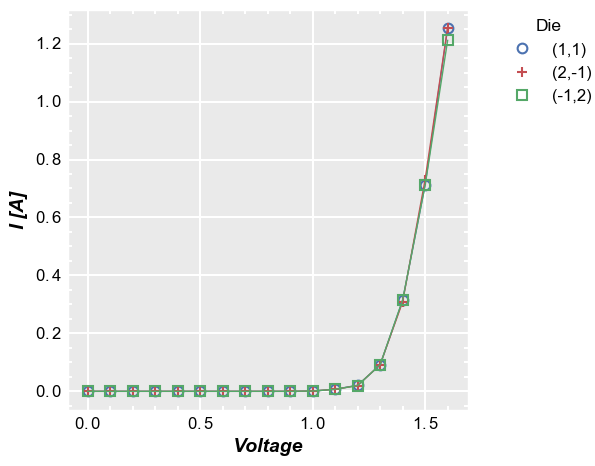

In [5]:
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450) &
         (df['Boost Level']==0.2) &
         (df['Temperature [C]']==25).copy()
        ]
fcp.plot(df=sub, x='Voltage', y='I [A]', leg_groups='Die', inline=True, show=True)

## Facet grid by boost level and temperature

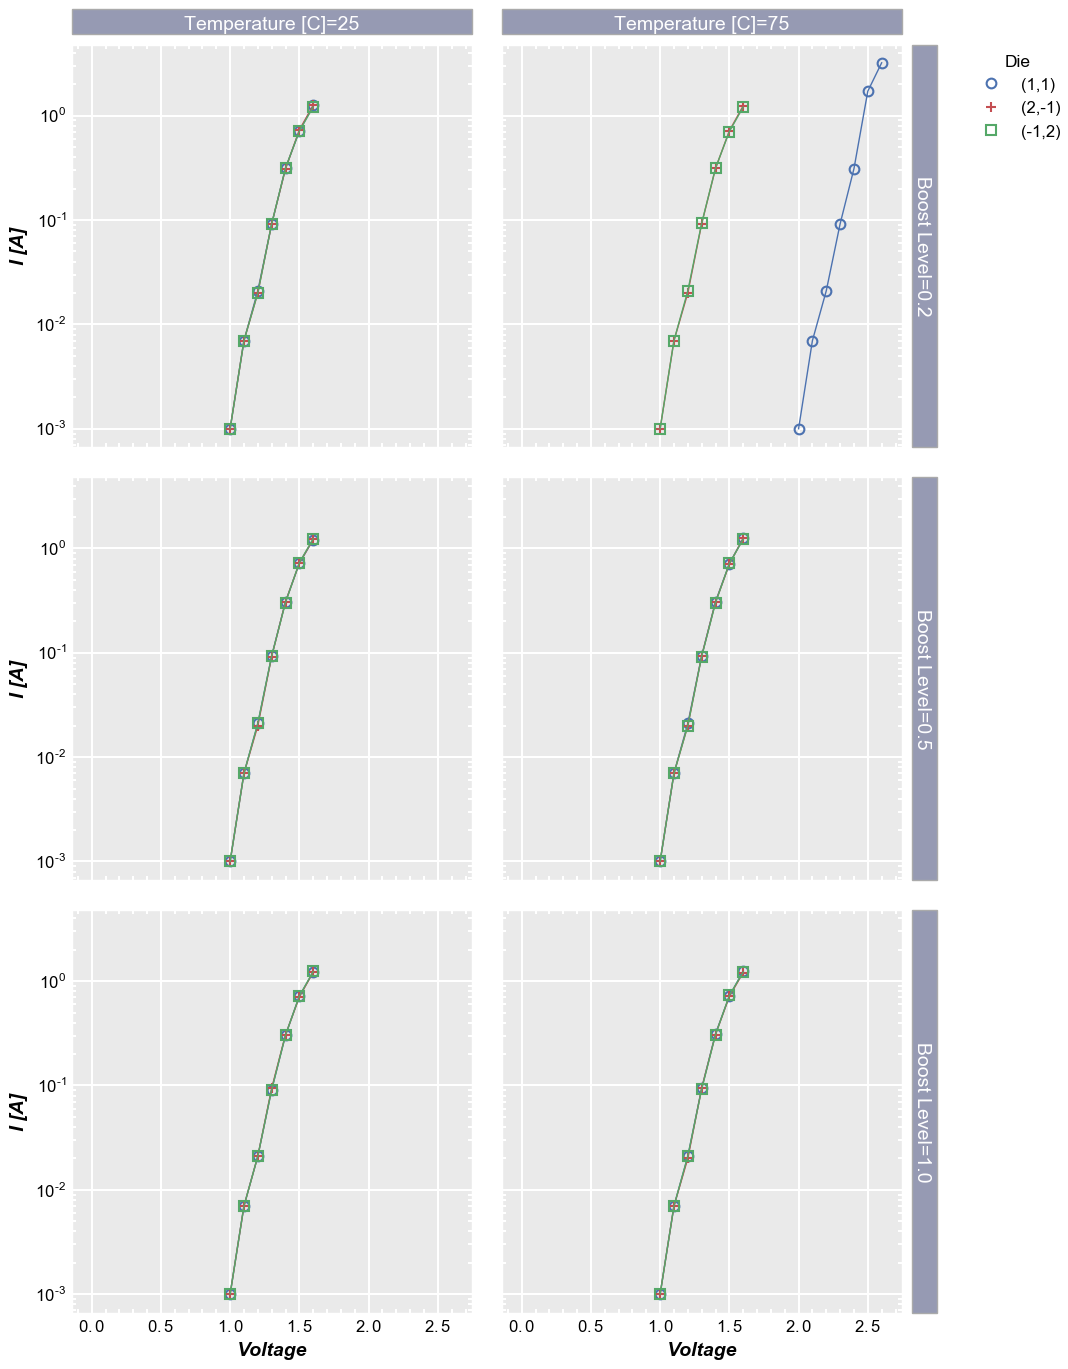

In [6]:
sub = df[(df.Substrate=='Si') &
          (df['Target Wavelength']==450)].copy()
fcp.plot(df=sub, x='Voltage', y='I [A]', leg_groups='Die', row='Boost Level', col='Temperature [C]', xticks=4, 
         inline=True, show=True, ax_scale='logy', )

## Facet grid by boost level and temperature (no axis sharing)

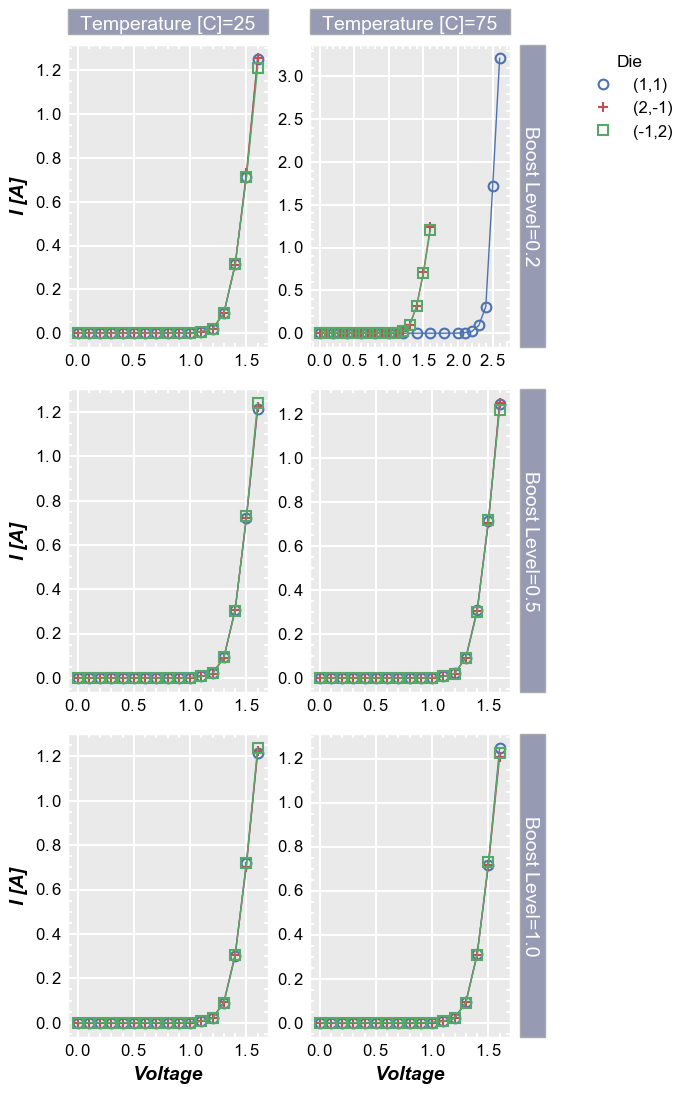

In [7]:
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450)].copy()
fcp.plot(df=sub, x='Voltage', y='I [A]', leg_groups='Die', row='Boost Level', col='Temperature [C]',
         sharex=False, sharey=False, ax_size=[200,300], inline=True)

## Facet grid by boost level and temperature with transformation

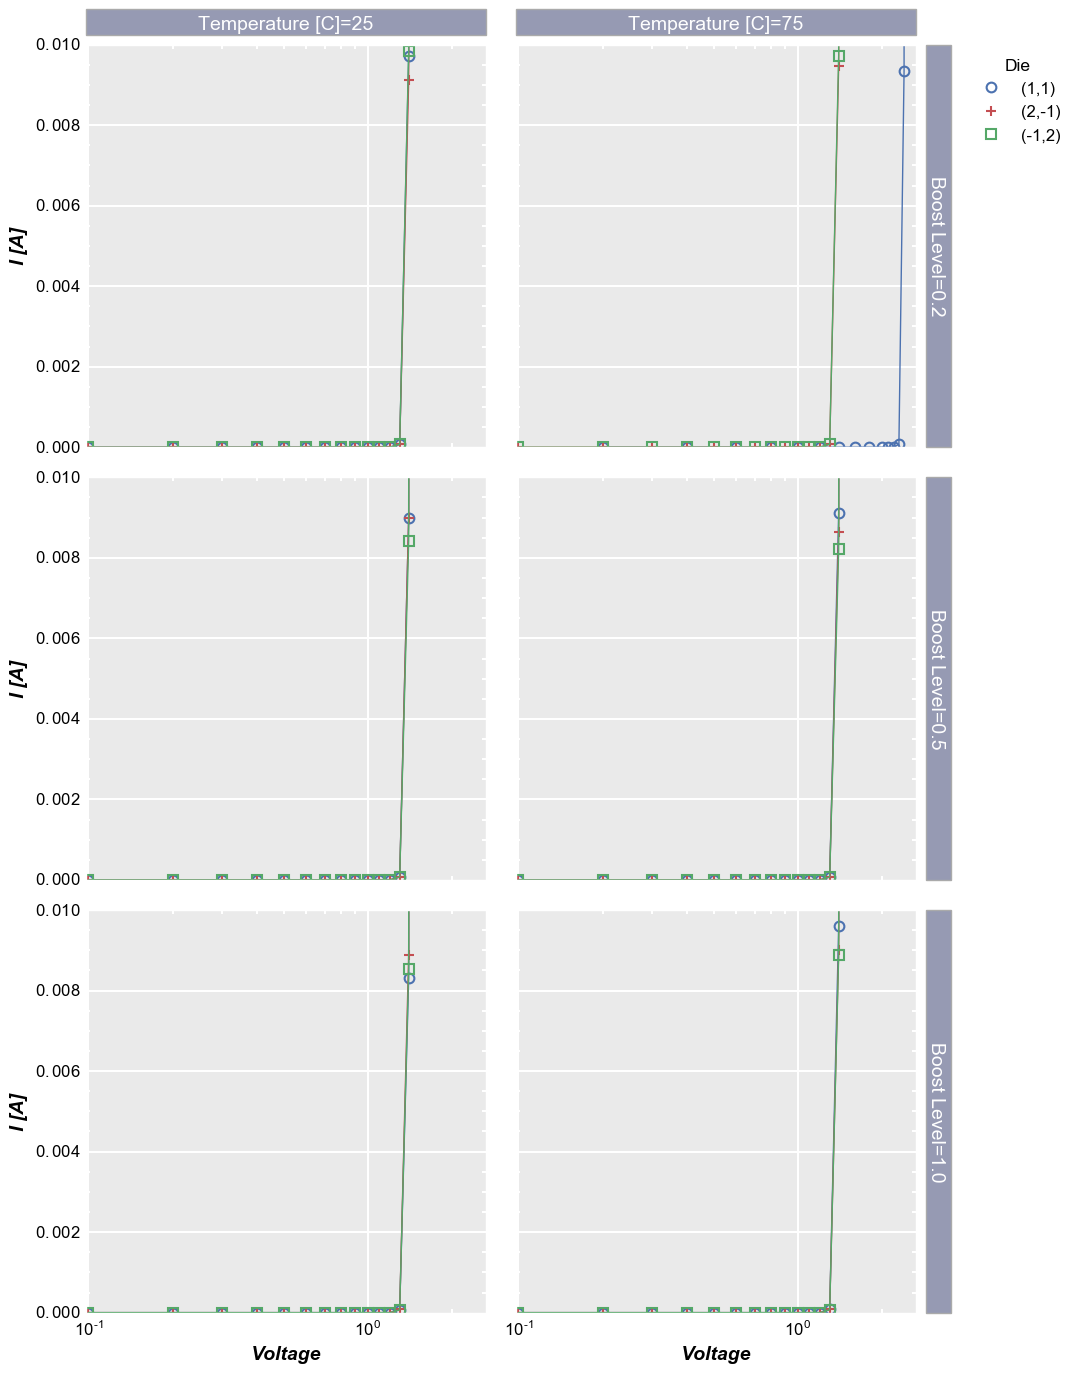

In [8]:
sub = df[(df.Substrate=='Si') &
         (df['Target Wavelength']==450)].copy()
fcp.plot(df=sub, x='Voltage', y='I [A]', leg_groups='Die', row='Boost Level', col='Temperature [C]', ax_scale='logx',
          ytrans=('pow',4), ymin=1E-8, ymax=1E-2, inline=True)  #issues here with ranges, ticks

## Fig groups example

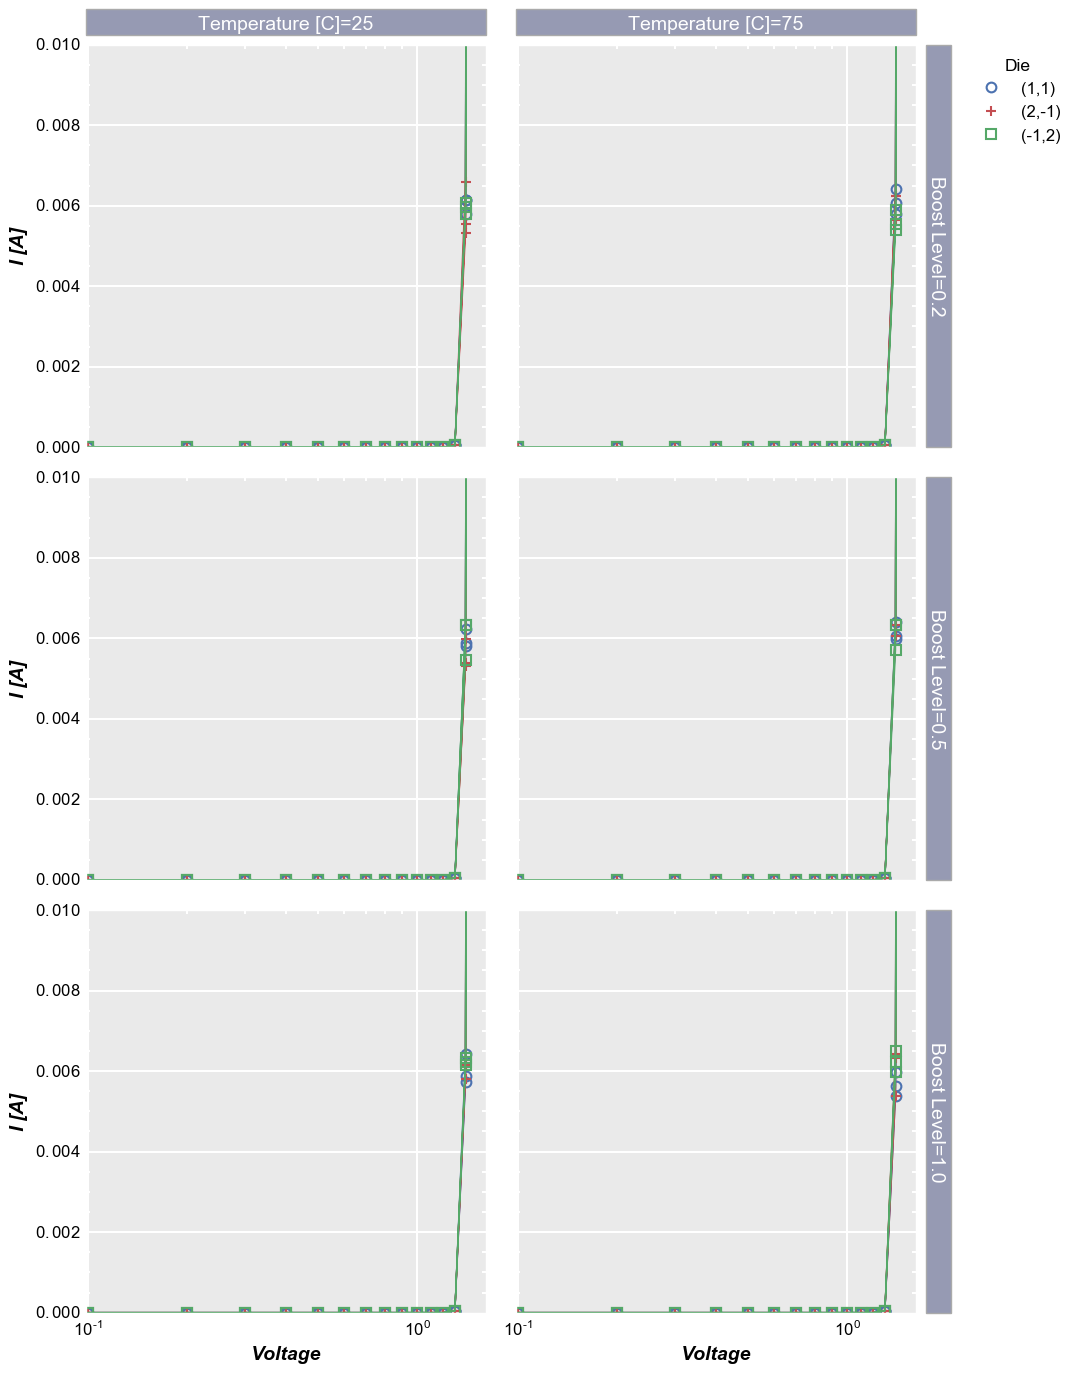

In [9]:
fcp.plot(df=df, x='Voltage', y='I [A]', leg_groups='Die', fig_groups=['Substrate'],
         row='Boost Level', col='Temperature [C]', ax_scale='logx',
         ytrans=('pow',4), ymin=1E-8, ymax=1E-2, inline=True)  #issues here with ranges, ticks

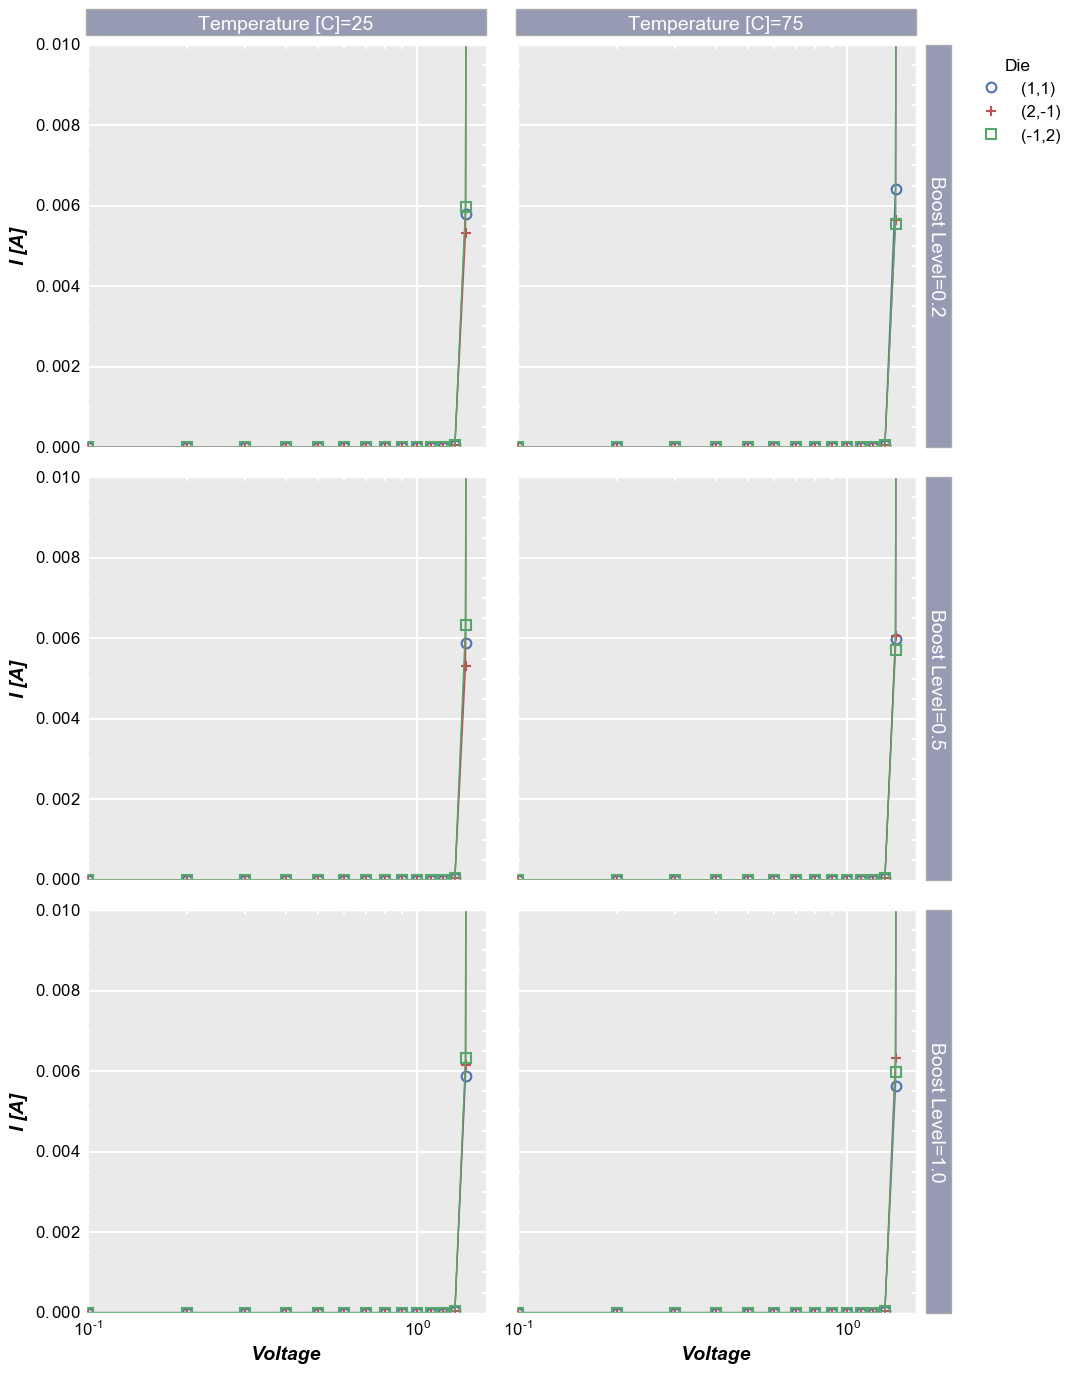

In [10]:
fcp.plot(df=df, x='Voltage', y='I [A]', leg_groups='Die', fig_groups=['Substrate', 'Target Wavelength'],
         row='Boost Level', col='Temperature [C]', ax_scale='logx', ytrans=('pow',4), ymin=1E-8, ymax=1E-2, inline=True)

## Multiple y on same axis with filter

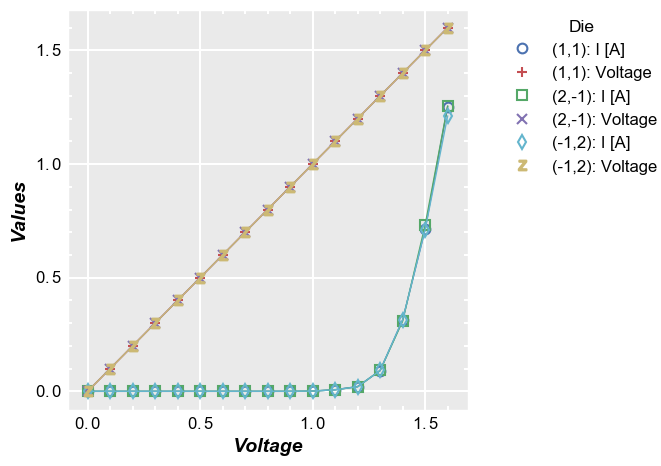

In [11]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y=['I [A]', 'Voltage'], filter=filt, leg_groups='Die', ylabel='Values', inline=True)

## Multiple y on same axis with filter and twinx

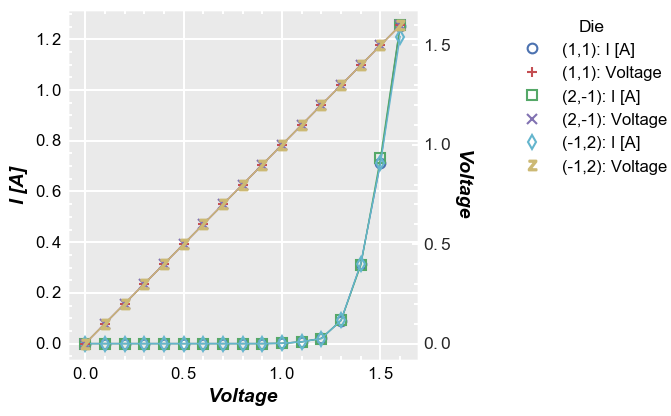

In [12]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y=['I [A]', 'Voltage'], filter=filt, inline=True, leg_groups='Die', 
         ylabel='I [A]', ylabel2='Voltage', twinx=True, ax_size=[350,350])

NEED STAT_VAL TEST

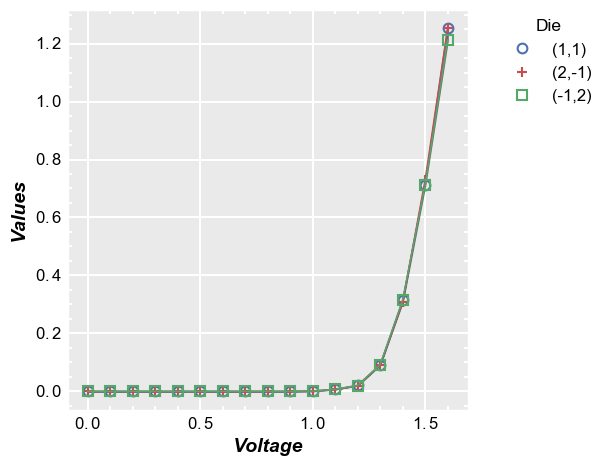

In [53]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y='I [A]', filter=filt, leg_groups='Die', ylabel='Values', inline=True, 
         conf_int='range')

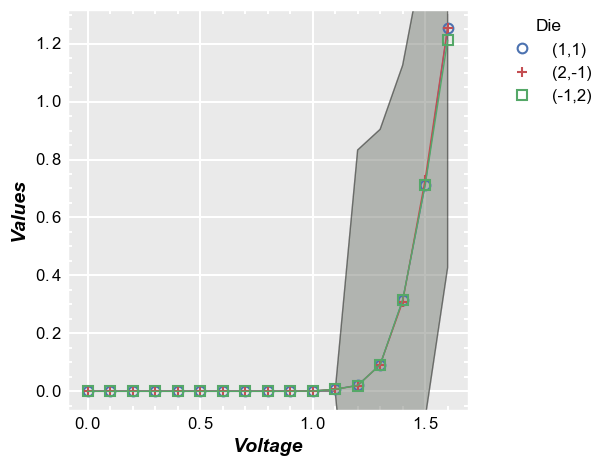

In [62]:
filt = 'Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25'
fcp.plot(df=df, x='Voltage', y='I [A]', filter=filt, leg_groups='Die', ylabel='Values', inline=True, 
         conf_int=0.99)

In [42]:
df.groupby(x).count().reset_index()[y]

NameError: name 'x' is not defined